# Data Analysis 
## Import packages 

In [0]:
from glob import glob
import os 
from keras.utils.np_utils import to_categorical
import numpy as np 
import pandas as pd
import imagesize
import seaborn as sns
import matplotlib.pyplot as plt

## Reading in the datasets 

In [0]:
def load_dataset(path):
    """
    Reads in the path of each images belonging to the different 
    datasets and then it assignes the correspoinding labels to them. 
    
    Returns 2 numpy arrays one containing file paths to images, 
    and one containing onehot-encoded classification labels.
    """
    # NORMAL 
    files_normal = glob(os.path.join(path, "NORMAL", "*.jpeg"))
    size_normal = len(files_normal)
    label_normal = [0] * size_normal
    
    # PNEUMONIA
    files_pneumonia = glob(os.path.join(path, "PNEUMONIA", "*.jpeg"))
    size_pneumonia = len(files_pneumonia)
    label_pneumonia = [1] * size_pneumonia

    # merge each label + file from the categories into one array
    labels = np.array(label_normal + label_pneumonia)
    files = np.array(files_normal + files_pneumonia)
    
    return files, labels

In [0]:
# paths to different datasets 
train_path = os.path.abspath(os.path.join('chest_xray', 'train'))
test_path =  os.path.abspath(os.path.join('chest_xray', 'test'))
valid_path =  os.path.abspath(os.path.join('chest_xray', 'val'))

# reading in the datasets 
train_files, train_targets = load_dataset(train_path)
test_files, test_targets  = load_dataset(test_path)
valid_files, valid_targets  = load_dataset(valid_path)

print('There are %d images in the train set.'% len(train_files))
print('There are %d images in the test set.'% len(test_files))
print('There are %d images in the validation set.'% len(valid_files))

There are 5216 images in the train set.
There are 624 images in the test set.
There are 16 images in the validation set.


## Creating a joint dataframe from the different datasets

### a. merge the datasaets into one dataframe 

In [0]:
# creating pandas dataframes from the datasets from above 
train_df = pd.DataFrame({'img':train_files, 'target':train_targets, 'group': "train"})
test_df = pd.DataFrame({'img':test_files, 'target':test_targets, 'group': "test"})
valid_df = pd.DataFrame({'img':valid_files, 'target':valid_targets, 'group': "valid"})

# creating a merged dataframe 
df_v1 = train_df.append(test_df)
df_v2 = df_v1.append(valid_df)
df_v2 = df_v2.reset_index()
df_v2.drop('index', axis=1, inplace=True)
df = df_v2 
df.head(3)

,group,img,target
0,train,C:\Users\Bhargitay\_MLN\Capstone\chest_xray\tr...,0
1,train,C:\Users\Bhargitay\_MLN\Capstone\chest_xray\tr...,0
2,train,C:\Users\Bhargitay\_MLN\Capstone\chest_xray\tr...,0


### b. adding the height and width of each image

In [0]:
# get the height and width of the images 
img_list = list(df.img)
list_size = len(img_list)
width = []
height = []

for i in list(range(0, list_size, 1)): 
        w, h = imagesize.get(img_list[i])
        width.append(w)
        height.append(h)

# testing if we have all the widths + heights for each image
print('There are %d images.'% list_size)
print('There are %d elements in the width list.'% len(width))
print('There are %d elements in the height list.'% len(height))

There are 5856 images.
There are 5856 elements in the width list.
There are 5856 elements in the height list.


In [0]:
# adding width and height to our dataframe 
df['width'] = width
df['height'] = height
df.drop('img', axis=1, inplace=True)
# adding an unique idetifier for each image
df = df.reset_index()
df.rename(columns={'index': 'img_id'}, inplace=True)
df.head(3)

,img_id,group,target,width,height
0,0,train,0,2090,1858
1,1,train,0,1422,1152
2,2,train,0,1810,1434


## Analyzing the dataset

### Distribution of images per target 

##### Labels 
0: Normal <br>
1: Pneunomia

In [0]:
df_small = df[['width', 'height']]
df_desc = df_small.describe().round()
convert2int = list(df_desc)
df_desc.loc[:,convert2int] = df_desc.loc[:,convert2int].astype('int', errors='ignore').apply(pd.to_numeric,downcast='unsigned')

df_desc.loc[['count', 'mean', 'min', 'max']]

,width,height
count,5856,5856
mean,1328,971
min,384,127
max,2916,2713


Text(0.5,1,'Number of images in the differenet datasets')

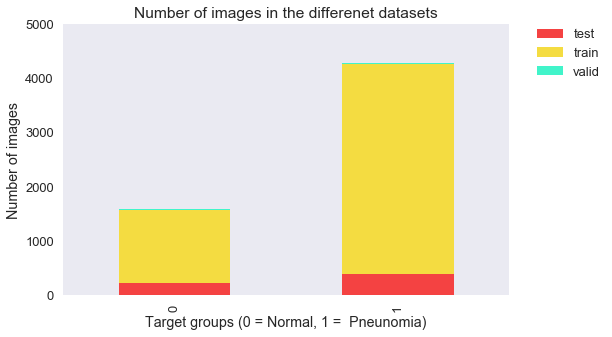

In [0]:
my_palette = ["#f44242", "#f4dc41", "#41f4ca"]

%matplotlib inline
sns.set()  # use Seaborn styles
sns.set_palette(my_palette)
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 5))

pivot = pd.pivot_table(df, index='target', columns='group', values='img_id',  aggfunc=lambda x: len(x.unique()))
plot = pivot.plot(kind='bar', stacked =True, ax = ax)

## show legend on the right side, outside of the plot 
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(ymax=5000) 
plt.grid(False)
plt.ylabel('Number of images')
plt.xlabel('Target groups (0 = Normal, 1 =  Pneunomia)')
plt.title("Number of images in the differenet datasets")

C:\Users\Bhargitay\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of width')

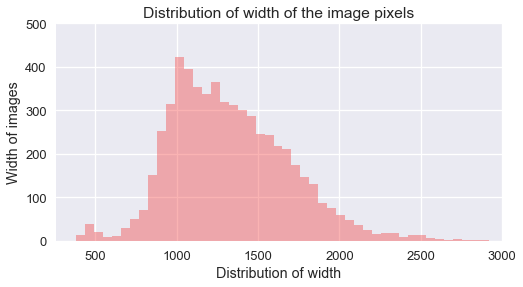

In [0]:
# distrubiton of width 
%matplotlib inline
sns.set()  # use Seaborn styles
sns.set_palette(my_palette)
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 4))
plot = sns.distplot(df.width, kde=False)
plot.set_title("Distribution of width of the image pixels")
#plt.grid(False)
plt.ylim(ymax=500)
plt.xlim(xmax=3000)
plt.ylabel('Width of images')
plt.xlabel('Distribution of width')

C:\Users\Bhargitay\AppData\Roaming\Python\Python35\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Distribution of height')

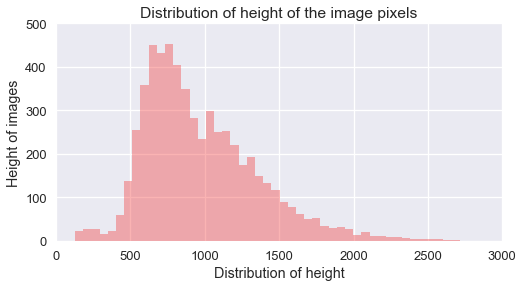

In [0]:
# distrubiton of width 
%matplotlib inline
sns.set()  # use Seaborn styles
sns.set_palette(my_palette)
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 4))
plot = sns.distplot(df.height, kde=False)
plot.set_title("Distribution of height of the image pixels")
plt.ylim(ymax=500)
plt.xlim(xmax=3000)
#plt.grid(False)
plt.ylabel('Height of images')
plt.xlabel('Distribution of height')